# Algoritmo para optimizar los artículos que cumplan con los requisitos de calorías y peso dados
Los Algoritmos Geneticos son métodos adaptativos que pueden usarse para resolver problemas de búsqueda  y optimización.
Un algoritmo genético consiste en una función matemática o una rutina de software que toma como entradas a los
ejemplares y retorna como salidas cuales de ellos deben generar descendencia para la nueva generación.

In [1]:
import numpy as np
from numpy import random
import math
import matplotlib.pyplot as plt

In [2]:
individuos = 4 #Numero de individuos en la poblacion
cromosoma = 8 #Numero de genes en un cromosoma
minCal = 2000.0 #Minimo de calorias de los alimentos llevados
maxPeso = 2.0 #Maximo peso de la mochina en kg
generaciones = 50 #Numero de veces que se repetira el algoritmo

In [3]:
#Calorias y pesos de los articulos
articulos = [
                [500, 0.5],
                [300, 0.1],
                [100, 0.5],
                [700, 0.25],
                [300, 0.15],
                [400, 0.15],
                [500, 0.5],
                [400, 0.3],
            ]
nombreArticulos = ['Leche', 'Galleta', 'Agua', 'Pan', 'Huevo', 'Nueces', 'Yogurt', 'Manzana']

In [4]:
#Numero de columna de las calorias para ubicarlas en la matriz de acticulos
calCol = 0
#Numero de columna del peso para ubicarlo en la matriz de acticulos
pesoCol = 1
#Numero total de calorias, global, de cada generacion
calTotal = 0.0
#Numero total de peso, global, de cada generacion
pesoTotal = 0.0
#Variable para guardar el indice del peor individuo, cambiado a los valores del mejor, para ignorarlo a la hora de mutar
individuoMenorCambiado = 0

In [5]:
#Numero de columnas para la matriz en la que se guardan los valores fitness
fitPorcentajes = 5
 #Matriz para guardar los valores fitness de la poblacion
fitnessValues = np.zeros((individuos, fitPorcentajes))
 #Numero de la columna para la suma del peso del individuo
fitPeso = 0
 #Numero de la columna para la suma de calorias del individuo
fitCal = 1
#Numero de la columna para el porcentaje de calorias del individuo
fitPesoPorcent = 2
#Numero de la columna para el porcentaje de peso del individuo
fitCalPorcent = 3
##Numero de la columna para la suma de porcentajes de peso y calorias del individuo
fitTotal = 4

In [6]:
#Recibe una población como entrada y muestra su contenido en un formato tabular#
#donde cada fila representa un individuo y cada columna representa un gen en su cromosoma#
def imprimirPoblacion(poblacion):
    for individuo in range(individuos):
        for gen in range(cromosoma):
            print(poblacion[individuo][gen], end = " ")
        print()
    print('-------------------------------------------------------')

In [7]:
def imprimirFitness(fitnessValues):
    for individuo in range(individuos):
        for valor in range(fitPorcentajes):
            print("{:.2f}".format(fitnessValues[individuo][valor]), end = " ")
        print()
    print('-------------------------------------------------------')

In [8]:
  ########## Metodo para encontrar al individuo mas fuerte ##########
def masFuerte():
    fuerte = 0
    indiceFuerte = 0
    for individuo in range(individuos):
        if(fitnessValues[individuo][fitTotal] > fuerte):
            fuerte = fitnessValues[individuo][fitTotal]
            indiceFuerte = individuo
    return indiceFuerte

In [9]:
 ########## Metodo para encontrar al individuo mas debil ##########
def masDebil():
    debil = math.inf
    indiceDebil = 0
    for individuo in range(individuos):
        if(fitnessValues[individuo][fitTotal] < debil):
            debil = fitnessValues[individuo][fitTotal]
            indiceDebil = individuo
    return indiceDebil

In [10]:
def mutacion():
    #En la mutacion solo se cambia un bit aleatorio de cada individuo, se tiene que ingnorar a algun individuo
    #En mi caso el individuo ignorado es el mas debil que fue cambiado por el fuerte
    for individuo in range(individuos):
        if(individuo != individuoMenorCambiado):
            mutado = random.randint(0, cromosoma)
            if(poblacion[individuo][mutado] == 1):
                poblacion[individuo][mutado] = 0
            elif(poblacion[individuo][mutado] == 0):
                poblacion[individuo][mutado] = 1

In [11]:
  ########## Metodo para intercambiar genes entre dos individuos, necesario para el metodo cruzamiento() ##########
def intercambio(individuo1, individuo2, punto):
    aux1 = -1
    aux2 = -1
    #Intercambio de valores entre individuos a partir del indice indicado por la variable punto
    for gen in range(punto, cromosoma):
        aux1 = poblacion[individuo1][gen]
        aux2 = poblacion[individuo2][gen]
        poblacion[individuo1][gen] = aux2
        poblacion[individuo2][gen] = aux1

In [12]:
 ########## Metodo para cruzar dos individuos ##########
def cruzamiento():
    puntoCruz = random.randint(2, cromosoma-2)

    for individuo in range(individuos):
        if(individuo % 2 == 0): #Esta condicion es para que ingnore al segundo individuo
            intercambio(individuo, individuo+1, puntoCruz)

In [13]:
 ########## Metodo para calcular los porcentajes de peso, calorias y total ##########
def calcularPorcentajeFitness():
    for individuo in range(individuos):
        # calorias / calorias totales * 100
        # peso / peso total * 100
        porcentCal = (fitnessValues[individuo][fitCal] /calTotal) * 100
        porcentPeso = (fitnessValues[individuo][fitPeso] /pesoTotal) * 100

        fitnessValues[individuo][fitCalPorcent] = porcentCal
        fitnessValues[individuo][fitPesoPorcent] = porcentPeso
        fitnessValues[individuo][fitTotal]  = porcentCal + porcentPeso

In [14]:
  ########## Metodo para obtener las calorias totales de un individuo ##########
def indCalorias(individuo):
    calorias = 0
    for gen in range(cromosoma):
        if(individuo[gen] == 1):
            calorias += articulos[gen][calCol]
    return calorias

In [15]:
  ########## Metodo para obtener el peso total de un individuo ##########
def indPeso(individuo):
    peso = 0
    for gen in range(cromosoma):
        if(individuo[gen] == 1):
            peso += articulos[gen][pesoCol]
    return peso

In [16]:
   ########## Metodo para calcular el fitness de la poblacion ##########
def fitness():
    global calTotal
    global pesoTotal
    calTotal = 0
    pesoTotal = 0

    for individuo in range(individuos):
        #Se obtienen calorias y peso total de cada individuo
        calorias = indCalorias(poblacion[individuo])
        peso = indPeso(poblacion[individuo])
        #En fitnessValues se van guardando los valores obtenidos respecto a los indices de los individuos
        fitnessValues[individuo][fitCal] = calorias
        fitnessValues[individuo][fitPeso] = peso
        #sumatoria de las calorias y peso de la generacion
        calTotal += calorias
        pesoTotal += peso
    calcularPorcentajeFitness()

In [17]:
########## Metodo para crear un individuo ##########
def crearIndividuo():
    ind = np.random.randint(2, size=(cromosoma), dtype=('int32'))
    #Se hace una comprobacion para que el peso no pase del maximo y las calorias no pasen del minimo
    while((indCalorias(ind) < minCal) or (indPeso(ind) > maxPeso)):
        ind = crearIndividuo() #Se crearan nuevos individuos hasta que los valores esten dentro del rango
    return ind


In [18]:
########## Metodo para crear una poblacion, requiere del metodo crearIndividuo() ##########
def crearPoblacion():
    poblacion = np.zeros((individuos, cromosoma), dtype=('int32'))
    for individuo in range(individuos):
        poblacion[individuo] = crearIndividuo()
    return poblacion


In [19]:
########## Metodo para actualizar la poblacion y crear una nueva generacion ##########
def nuevaGeneracion():
    global poblacion
    global calTotal
    global pesoTotal
    for individuo in range(individuos):
        #Se hace una comprobacion para que el peso no pase del maximo y las calorias no pasen del minimo
        if((indCalorias(poblacion[individuo]) < minCal) or (indPeso(poblacion[individuo]) > maxPeso)):
            poblacion[individuo] = crearIndividuo() #Si hay un individuo incorrecto entonces se crea uno nuevo
    #Recalculo de fitness con la nuegeneracionva
    fitness()

In [20]:
 ########## Metodo para encontrar al mejor individuo ##########
def masAptoTotal(generacion):
    global mejorIndividuo
    global generacionMejor
    global mejorIndCromosoma
    for individuo in range(individuos):
        if(fitnessValues[individuo][fitTotal] > mejorIndividuo[fitTotal]):
            for gen in range(cromosoma):
                mejorIndCromosoma[gen] = poblacion[individuo][gen]
            for valor in range(fitPorcentajes):
                mejorIndividuo[valor] = fitnessValues[individuo][valor]
                generacionMejor = generacion


In [21]:
#Crearde la poblacion
poblacion = crearPoblacion()
#Variables para visualizar el mejor individuo
mejorIndividuo = np.zeros((fitPorcentajes), dtype=('float32'))
mejorIndCromosoma = np.zeros((cromosoma), dtype=('int32'))
generacionMejor = 0
#Variables para graficar
x = np.zeros((generaciones+1), dtype=('float32'))
y = np.zeros((generaciones+1), dtype=('float32'))

#Se calcula el fitness por primera vez
fitness()
print('POBLACION INICIAL')
imprimirPoblacion(poblacion)
imprimirFitness(fitnessValues)

POBLACION INICIAL
1 0 0 0 1 1 1 1 
0 1 1 1 0 1 1 1 
1 1 1 0 1 1 0 1 
1 0 0 1 0 0 1 1 
-------------------------------------------------------
1.60 2100.00 24.06 24.42 48.48 
1.80 2400.00 27.07 27.91 54.97 
1.70 2000.00 25.56 23.26 48.82 
1.55 2100.00 23.31 24.42 47.73 
-------------------------------------------------------


In [22]:
#repite el algoritmo la veces que se indique en generaciones
for i in range(generaciones+1):
    print('________GENERACION ', i, '________')

    #Seleccion
    #individuo mas debil de la poblacion
    individuoMenorCambiado = masDebil()
    #Se intercambia el individuo mas debil con el mas fuerte de la poblacion
    poblacion[masDebil()] = poblacion[masFuerte()]
    print('SELECCION: ELIMINACION DEL INDIVIDUO MAS DEBIL')
    imprimirPoblacion(poblacion)
    #Cruzamiento entre individuos de la poblacion
    cruzamiento()
    print('CRUZAMIENTO')
    imprimirPoblacion(poblacion)
    #Mutacion
    mutacion()
    print('MUTACION')
    imprimirPoblacion(poblacion)
    #Se calcula de nuevo fitness para los individuos modificados
    fitness()
    print('CALCULO DEL FITNESS CON INDIVIDUOS MODIFICADOS')
    imprimirFitness(fitnessValues)
    #crear una nueva generacion, los que no cumplen se eliminan y entran nuevos individuos
    #Se recalcula el fitness de la nueva generacion dentro de la funcion
    nuevaGeneracion()
    print('SE CREA LA NUEVA GENERACION')
    imprimirPoblacion(poblacion)
    imprimirFitness(fitnessValues)

    masAptoTotal(i)
    imprimirFitness(fitnessValues)

    y[i] = mejorIndividuo[fitTotal]
    x[i] = i

________GENERACION  0 ________
SELECCION: ELIMINACION DEL INDIVIDUO MAS DEBIL
1 0 0 0 1 1 1 1 
0 1 1 1 0 1 1 1 
1 1 1 0 1 1 0 1 
0 1 1 1 0 1 1 1 
-------------------------------------------------------
CRUZAMIENTO
1 0 0 0 1 1 1 1 
0 1 1 1 0 1 1 1 
1 1 1 0 1 1 1 1 
0 1 1 1 0 1 0 1 
-------------------------------------------------------
MUTACION
0 0 0 0 1 1 1 1 
0 0 1 1 0 1 1 1 
1 1 1 1 1 1 1 1 
0 1 1 1 0 1 0 1 
-------------------------------------------------------
CALCULO DEL FITNESS CON INDIVIDUOS MODIFICADOS
1.10 1600.00 16.79 18.18 34.98 
1.70 2100.00 25.95 23.86 49.82 
2.45 3200.00 37.40 36.36 73.77 
1.30 1900.00 19.85 21.59 41.44 
-------------------------------------------------------
SE CREA LA NUEVA GENERACION
1 0 0 1 1 1 1 0 
0 0 1 1 0 1 1 1 
1 1 0 1 0 0 1 1 
1 1 1 0 1 1 0 1 
-------------------------------------------------------
1.55 2400.00 23.48 26.97 50.45 
1.70 2100.00 25.76 23.60 49.35 
1.65 2400.00 25.00 26.97 51.97 
1.70 2000.00 25.76 22.47 48.23 
------------------

MEJOR INDIVIDUO
[   1.95     3100.         32.5        31.958763   64.45876 ]
En la generacion:  9

ARTICULOS: 
Leche ,  Galleta ,  Pan ,  Huevo ,  Nueces ,  Yogurt ,  Manzana ,  

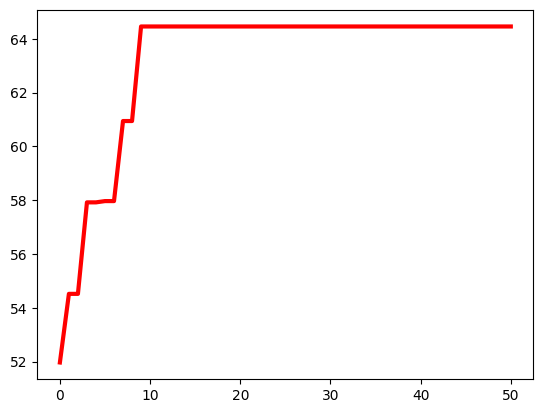

In [23]:
print('MEJOR INDIVIDUO')
np.set_printoptions(suppress=True)
print(mejorIndividuo)
print('En la generacion: ', generacionMejor)
print()
print('ARTICULOS: ')
for gen in range(cromosoma):
    if(mejorIndCromosoma[gen] == 1):
        print(nombreArticulos[gen], ', ', end = ' ')
#Grafica de las generaciones y mejores individuos
plt.plot(x, y, color='red', linewidth=3)
plt.show()